# Trabalho de Teleinformática e Redes 1

## Capa

### Nome do Simulador
**VAVOV**

### Membros do Grupo

- **Gustavo Almeida Valentim** - Matrícula: 20/2014468
- **Guilherme Henrique Oliveira** - Matrícula: 21/1026646
- **Aluizio Oliveira** - Matrícula: 20/2042720
- **Ivanov Machado** - Matrícula: 20/2063669


##  Introdução
Este trabalho tem como objetivo realizar a simulação das camadas de enlace e física, abordando a implementação de diversos protocolos e técnicas fundamentais para a comunicação em redes. A simulação cobre duas áreas principais:

1. **Camada de Enlace:** Nesta camada, são simulados os protocolos de enquadramento de dados, que incluem a Contagem de Caracteres e a Inserção de Bytes, além dos mecanismos de detecção de erros, como o Bit de Paridade Par e o CRC (Cyclic Redundancy Check). Também é incluído o protocolo de correção de erros utilizando o Código de Hamming, que visa garantir a integridade dos dados transmitidos.

2. **Camada Física:** Para a camada física, o foco é a modulação de sinais, abordando tanto a modulação banda-base quanto a modulação por portadora. A modulação banda-base inclui técnicas como NRZ (Non-Return to Zero), Manchester e Bipolar. Por outro lado, a modulação por portadora cobre técnicas como ASK (Amplitude Shift Keying), FSK (Frequency Shift Keying) e 8-QAM (8-Quadrature Amplitude Modulation).

Através da implementação desses protocolos e técnicas, o trabalho busca fornecer uma visão abrangente do funcionamento das camadas de enlace e física em um sistema de comunicação, destacando suas funcionalidades e desafios. O desenvolvimento foi realizado utilizando a linguagem Python e a interface Streamlit, com o código-fonte hospedado no GitHub para facilitar o controle de versão e a colaboração. 

O projeto visa não apenas simular o comportamento dessas camadas, mas também integrar os diversos componentes para oferecer um simulador unificado que permite a análise e compreensão dos processos envolvidos na comunicação digital.

Nesta primeira parte, será abordado as modulações digitais, tais como NRZ-Polar, Manchester, Bipolar, ASK, FSK e 8-QAM


## Implementação

Descrição detalhada do desenvolvimento com diagramas ilustrativos, o funcionamento dos protocolos, procedimentos utilizados, bem como decisões tomadas relativas aos casos e detalhes de especificação que porventura estejam omissos no enunciado.

### Camada física

#### NRZ_Polar
Esse é o método mais simples de codificação. Se o bit recebido for 0, o sinal será -1. Se for 1, o sinal será 1.

In [84]:
import numpy as np

def nrz_polar(bits):
    signal = []         #  Lista de  bits
    for bit in bits:
        if bit == '0':  #  Bits 0 e 1 são representados por -1 e 1
            signal.append(-1)
        else:
            signal.append(1)
    return signal

Como observado, a função recebe uma string '0' ou '1' e se o bit for 0 ele vira -1, do contrário, se for 1 ele vira 1

![Captura de Tela 2024-09-01 às 23.04.50.png](<attachment:Captura de Tela 2024-09-01 às 23.04.50.png>)
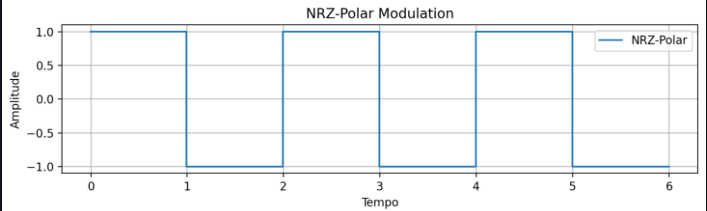

In [85]:
bits = '101010'
nrz_polar(bits)


[1, -1, 1, -1, 1, -1]

#### Manchester
É uma codificação que trabalha com uma transição negativa-para-positiva representa o 1
binário e uma transição positiva-para-negativa representa o 0.
Alcança o mesmo nível de sincronização que a RZ, mas com
somente dois níveis de amplitude.

In [86]:
# Função para modulação Manchester
def manchester(bits, clock):
    nrz_signal = nrz_polar(bits)  # Recebe o sinal NRZ-Polar
    nrz_expanded = np.repeat(nrz_signal, 100)  # Repete o sinal para 100 vezes cada elemento da lista, [0,1] vira [0,0,0,0...,1,1,1,1...]
    manchester_signal = np.logical_xor(nrz_expanded > 0, clock > 0.5).astype(int)
    manchester_signal = manchester_signal * 2 - 1  # Ajusta os valores para -1 e 1
    return manchester_signal

Como visto, por ele possuir o mesmo sincronismo da nrz, ele utiliza a função na propria manchester

![Captura de Tela 2024-09-01 às 23.05.38.png](<attachment:Captura de Tela 2024-09-01 às 23.05.38.png>)
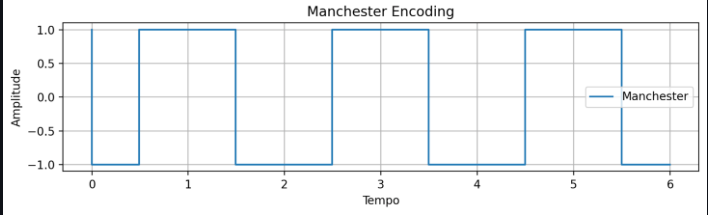

In [87]:
bits= 101010


#### Bipolar
Nesta modulação o sinal é codificado utilizando três níveis de voltagens: positivo, negativo e zero

O bit 0 serve para representar o bit 0
O bit 1 representa +1 e -1, onde o primeiro bit 1 é representado pela amplitude positiva, já o segundo será representado pela amplitude negativo, o terceiro pela positiva e assim segue.

In [88]:
# Função para modulação Bipolar
def bipolar(bits):
    signal = []
    bits_um = None
    for bit in bits:
        if bit == '0':
            signal.append(0)
        else:
            if bits_um is None:
                bits_um = 1
                signal.append(bits_um)
            else:
                if bits_um == 1:
                    bits_um = -1
                    signal.append(bits_um)
                else:
                    bits_um = 1
                    signal.append(bits_um)
    return signal

![Captura de Tela 2024-09-01 às 23.06.05.png](<attachment:Captura de Tela 2024-09-01 às 23.06.05.png>)
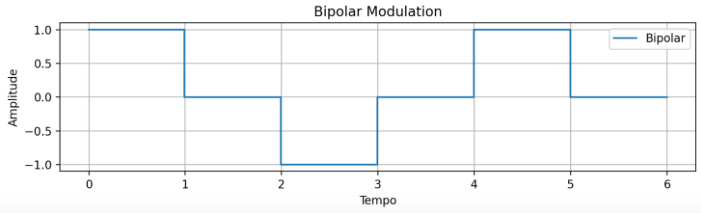

In [89]:
bits= '1100101' 
bipolar(bits)


[1, -1, 0, 0, 1, 0, -1]

#### Modulação ASK
É uma modulação em que a amplitude de uma portadora é alterada de acordo com o valor dos bits do sinal de entrada, ou seja, os bits 1 representam uma amplitude, já os bits 0, são representados pela ausência de sinal

In [90]:
# Função para modulação ASK
def ask_modulation(nrz_signal, carrier):
    # Expande o sinal NRZ para combinar com a frequência do portador
    nrz_expanded = np.repeat(nrz_signal, 100)
    # Modula o sinal portador com base no sinal NRZ
    ask_signal = np.where(nrz_expanded == 1, carrier, 0)
    return ask_signal

O sinal NRZ é utilizado na modulação ASK porque é uma representação simples e direta dos dados binários.

A função ask_modulation utiliza o sinal NRZ e o modula com uma onda portadora para criar um sinal ASK, onde a amplitude da portadora varia de acordo com os bits do sinal NRZ.

![Captura de Tela 2024-09-01 às 23.09.59.png](<attachment:Captura de Tela 2024-09-01 às 23.09.59.png>)
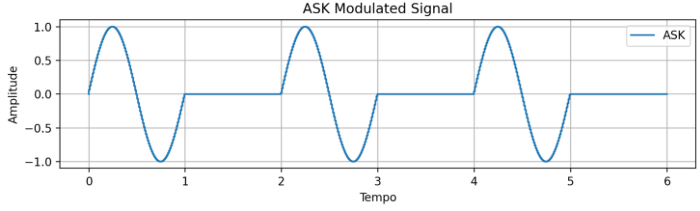

#### Modulação FSK
Novamente é uma modulação em que a amplitude de uma portadora é alterada de acordo com o valor dos bits do sinal de entrada. Dessa vez, o bit 1 é representado por uma frequência alta. O bit 0 é representado por uma frequência baixa.

In [4]:
# Função para modulação FSK
def fsk_modulation(nrz_signal, t, carrier_freq):
    # Expande o sinal NRZ para combinar com a frequência do portador
    nrz_expanded = np.repeat(nrz_signal, 100)
    # Define frequências para FSK
    freq_high = carrier_freq * 2
    freq_low = carrier_freq
    # Modula o sinal com FSK
    fsk_signal = np.where(nrz_expanded == 1, np.sin(2 * np.pi * freq_high * t), np.sin(2 * np.pi * freq_low * t))
    return fsk_signal

![Captura de Tela 2024-09-01 às 23.10.52.png](<attachment:Captura de Tela 2024-09-01 às 23.10.52.png>)
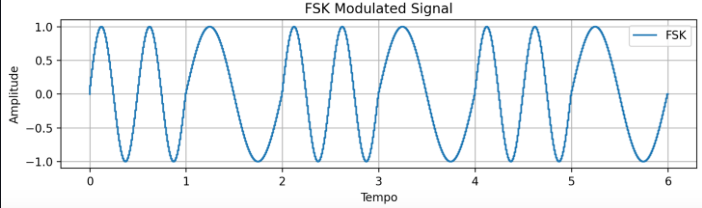

#### Modulação 8-QAM
A modulação 8-QAM (Quadrature Amplitude Modulation) é uma técnica de modulação que combina modulação em amplitude e em fase para transmitir dados, utilizando uma faixa de valores de -3 a 3. Cada símbolo na 8-QAM representa 3 bits, resultando em 8 possíveis combinações de bits que são mapeadas para 8 diferentes pontos na constelação.

Como a Função Funciona
Divisão dos Bits em Grupos de 3: Os bits são divididos em grupos de 3, e cada grupo é mapeado para um ponto específico na constelação 2D. Essa constelação utiliza valores de -3 a 3 para definir as coordenadas (real e imaginária) dos símbolos.

Mapeamento dos Símbolos: Cada grupo de 3 bits é convertido em um número decimal que é então mapeado para uma coordenada específica na constelação. O valor decimal define tanto a parte real quanto a imaginária do número complexo que representa o símbolo.

Geração do Sinal Modulado: A função gera um sinal modulado combinando as partes real e imaginária para cada símbolo, resultando em uma sequência de números complexos que representam o sinal modulado 8-QAM.

In [2]:
import numpy as np

def modulacao(bits):
    """Modula uma sequência de bits utilizando 8-QAM."""
    constelacao = {
        '000': complex(-3, -3),
        '001': complex(-3, 3),
        '010': complex(3, -3),
        '011': complex(3, 3),
        '100': complex(-3, 0),
        '101': complex(3, 0),
        '110': complex(0, -3),
        '111': complex(0, 3),
    }
    
    # Divide os bits em grupos de 3
    simbolos = [bits[i:i+3] for i in range(0, len(bits), 3)]
    
    # Modula cada grupo de 3 bits usando a constelação 8-QAM
    sinal_modulado = [constelacao[simbolo] for simbolo in simbolos]
    
    return np.array(sinal_modulado)

# Exemplo de uso
bits = '000001010011100101110'
sinal_modulado = modulacao(bits)

O exemplo acima mapeia a sequência de bits 000001010011100101110 para uma sequência de símbolos complexos utilizando a constelação 8-QAM. A saída será algo como:

In [3]:
print(sinal_modulado)

[-3.-3.j -3.+3.j  3.-3.j  3.+3.j -3.+0.j  3.+0.j  0.-3.j]


Neste caso, cada símbolo é um número complexo onde a parte real e a parte imaginária representam as coordenadas no espaço 2D da constelação 8-QAM. O uso dos valores de -3 a 3 garante que os símbolos estejam distribuídos uniformemente em torno da origem, proporcionando uma modulação robusta para transmissão de dados em canais ruidosos.

### Enlace 
A camada de enlace é responsável por gerenciar as conexões diretas entre dispositivos na mesma rede, organizando a transmissão de dados em quadros, gerenciando erros, controlando o acesso ao meio físico e endereçando os dispositivos na rede. Ela serve como um intermediário entre a camada física (que trata da transmissão real dos bits) e as camadas superiores que lidam com a lógica e a organização dos dados. Neste trabalho iremos apresentar protocolos de enquadramento de dados (Contagem de caracteres e inserção de bytes), protocolos de detecção de erro (Bit de Paridade Par e CRC) e o protocolo de correção de erros Hamming.

#### Contagem de Caracteres

A contagem de caracteres é uma técnica usada na camada de enlace para indicar o número de caracteres (ou bytes) que estão sendo transmitidos em um quadro. Esse método é uma forma de identificar o início e o fim de um quadro de dados, permitindo que o receptor saiba exatamente quantos caracteres processar.

Por se tratar de um trabalho que simula a camada de enlace optou-se por fazer exemplos diretamente usando bytes, mas para caracteres comuns como uma mensagem "Hello World" bastava transformar a mensagem para bits.

Por exemplo na mensagem : 00001111 00110011 seria enquadrado da seguinte forma 00000011 00001111 00110011 pois o primeiro byte representa o tamanho do quadro (3) se houver algum erro de recepção da mensagem saberemos pelo tamanho.Como exemplo prático segue o código abaixo contendo a funções encoding e decoding :



In [92]:
def bytes_to_bin(byte_data):
    return ''.join(format(byte, '08b') for byte in byte_data)

def contador_de_caracteres_encoding(data):
    length = len(data) + 1
    return bytes([length]) + data # Inclui o tamanho na frente

def contador_de_caracteres_decoding(frame):
    length = frame[0]
    return frame[1:length] #Extração do 2º byte até o byte até o tamanho total (ultimo)

data = b'\x0F\x33' # 00001111 00110011
encoded_frame = contador_de_caracteres_encoding(data)
print(bytes_to_bin(encoded_frame))
decoded_data = contador_de_caracteres_decoding(encoded_frame) 
print(bytes_to_bin(decoded_data))

000000110000111100110011
0000111100110011


#### Inserção de Bytes

O protocolo de inserção de bytes refere-se a técnicas usadas para modificar, adicionar ou estruturar bytes em dados de comunicação, geralmente em contextos de transmissão de dados, armazenamento ou protocolos de comunicação. Essa inserção é essencial para diversos aspectos da comunicação digital, como formatação de dados, codificação e controle de erros.

Desta forma elaboramos um codigo que recebe uma menssagem : 01111111111110. Pra executar o protocolo vamos adicionar flags : 01111110 , no ínico e fim e ainda inserir bits específicos dentro da mensagem para que não haja erro de comunicação entre flags e mensagem, segue o código abaixo.


In [93]:
def inserçao_bytes(bits):
    FLAG = "01111110"
    bits_inseridos = ""
    uns_consecutivos = 0

    for bit in bits:
        bits_inseridos += bit  # Adiciona o bit atual
        if bit == '1':
            uns_consecutivos += 1
            if uns_consecutivos == 5:
                bits_inseridos += '0'  # Insere o bit 0 após cinco 1s consecutivos
                uns_consecutivos = 0
        else:
            uns_consecutivos = 0

    # Adiciona as FLAGS no início e no final
    return FLAG + bits_inseridos + FLAG

def desinserçao_bytes(bits_inseridos):
    FLAG = "01111110"
    bits_desinseridos = ""
    uns_consecutivos = 0

    # Remove as FLAGS no início e no final
    bits_inseridos = bits_inseridos[len(FLAG):-len(FLAG)]

    i = 0
    while i < len(bits_inseridos):
        bit = bits_inseridos[i]

        if uns_consecutivos == 5:
            if bit == '0':
                uns_consecutivos = 0
                i += 1  # Pula o bit de stuffing (o 0 inserido)
                continue

        bits_desinseridos += bit

        if bit == '1':
            uns_consecutivos += 1
        else:
            uns_consecutivos = 0

        i += 1

    return bits_desinseridos

data = '01111111111110'
bits_inseridos = inserçao_bytes(data)
print("Mensagem com Flags" , bits_inseridos)
bits_desinseridos = desinserçao_bytes(bits_inseridos)
print("Mensagem sem flags",bits_desinseridos)

Mensagem com Flags 01111110011111011111011001111110
Mensagem sem flags 01111111111110


Agora, na camada de enlace, nos temos os protocolos que realizam a detecção de erros, que são:

#### Bit de paridade par
O Bit de paridade par consiste em um método em que o último bit de um dado, representa 1, caso o número de 1 do dado seja impar, ou representa 0 caso o número de 1 do dado seja par. Ex: 11110. O bit 0 representa o bit de paridade par. Este método é eficaz caso o dado chegue ao receptor com algum dos bits modificados, e com base no bit de paridade, consegue verificar se houve ou não erro durante a transmissão

In [94]:
def paridade_bit(mensagem):
    count = 0
    # Conta o número de bits 1 na mensagem
    for bit in mensagem:
        if bit == '1':
            count += 1
    
    # Determina o bit de paridade
    if count % 2 ==0:
        bit_paridade = '0'
    else:
        bit_paridade = '1'
    
    # Adiciona o bit de paridade ao final da mensagem
    return mensagem + bit_paridade

O codigo acima ele percorre a mensagem e conta o número de 1 da mensagem, e com base no resto da divisão desse número, ele determina se o bit de paridade par será 1 ou 0, retornando a mensagem original com seu bit de paridade

In [95]:
def verifica_paridade(mensagem):
    x= ''
    contador= 0
    paridade_bit = mensagem[-1]
    for bit in mensagem[:-1]:
        print(mensagem[:-1])
        if bit == '1':
            contador += 1
    
    if contador % 2 == int(paridade_bit):
        x= 'Mensagem sem erro'
    else:
        x='Mensagem com erro'
    return x

Agora este código acima, realiza a verificação do bit de paridade da função recebida. Ele realiza o processo de pegar o bit de paridade que chegou com a mensagem e separar da mensagem. Com a mensagem separada do bit de paridade recebido, verifica se a mensagem separada possuiria o mesmo bit de paridade que chegou com a mensagem transmitida. Se for o mesmo bit, a mensagem não possui erro, do contrário, possui erro

#### CRC-32
O CRC-32 é um outro método de detecção de erros, que, diferente do bit de paridade par, utiliza sua verificação através de uma divisão polinomial. O sistema possui um polinômio divisor específico para o sistema (no caso do CRC-32, um polinômio de 32 bits), e o dado que será transmitido, é feito a divisão por este polinômio, e o CRC será obtido através do resto dessa divisão e anexado a mensagem.

In [96]:
def CRC32(mensagem):
    # Calcula o CRC32 da mensagem
    crc32 = zlib.crc32(mensagem.encode())
    # Adiciona o CRC32 ao final da mensagem (em hexadecimal)
    mensagem_com_crc = f"{mensagem}{crc32:08x}"
    
    return mensagem_com_crc

A função zlib.crc32 já retorna o crc32  de qualquer mensagem. O crc-32 é anexado a mensagem recebido logo em seguida, no formato hexadecimal.

In [97]:
def verifica_CRC32(mensagem_com_crc):
    # Separa a mensagem e o CRC32 da mensagem recebida
    mensagem_separada = mensagem_com_crc[:-8]
    crc32_reduzido = mensagem_com_crc[-8:]
    
    # Calcula o CRC32 da mensagem (sem o valor de CRC32)
    crc32_calculado = zlib.crc32(mensagem_separada.encode())
    # Converte o CRC32 calculado para hexadecimal e compara com o CRC32 recebido
    crc32_calculado_hex = f"{crc32_calculado:08x}"
    
    # Verifica se o CRC32 calculado coincide com o CRC32 recebido
    if crc32_calculado_hex == crc32_reduzido:
        return 'Mensagem sem erro'  # Mensagem está correta
    else:
        return 'Mensagem com erro'  # Mensagem está corrompida

Agora a função de verificação para ver se a mensagem possui erro, realiza o seguinte método: separa-se a mensagem recebida do crc-32, calcula o crc-32 dessa mensagem recebida e compara, se foi o mesmo crc que chegou junto da mensagem, ele retorna mensagem sem erro, do contrário, retorna mensagem com erro

#### Hamming

O protocolo de correção de erros Hamming utiliza bits de paridade inseridos dentro da mensagem para verificar e corrigir erros. Os bits de paridade são posicionados em locais específicos na mensagem, e a estrutura da mensagem codificada segue um padrão que permite a detecção e correção de erros. 



In [98]:

def bitlist_to_string(bitlist):
    return ''.join(str(bit) for bit in bitlist)

def bytes_to_bitlist(data):
    bitlist = []
    for byte in data:
        for i in range(8):
            bitlist.append((byte >> (7-i)) & 1)
    return bitlist


def hamming_encode(d2):

    data = bytes_to_bitlist(d2)
    tam = len(data)
    multiplo = [1]
    while tam > multiplo[-1]:
        multiplo.append(multiplo[-1]*2)
        
    # Inserindo bits de paridade nas posições 1, 2, 4, 8, ...
    for i in multiplo:
        data.insert(i-1, 0)  # Inicialmente, os bits de paridade são 0

    # Calculando os valores corretos para os bits de paridade
    for i in multiplo:
        paridade = 0
        for j in range(i, len(data) + 1):
            # Verifica se o bit está na posição correta para ser incluído no cálculo
            if j & i:
                paridade ^= data[j-1]
        data[i-1] = paridade 
   # Atualiza o bit de paridade com o valor calculado
    return data


def hamming_decode(data):
    tam = len(data)
    multiplo = [1]
    while multiplo[-1] < tam:
        multiplo.append(multiplo[-1]*2)
    # multiplo se torna [1, 2, 4, 8, 16, ...]
        
    # Verificando e corrigindo os bits de paridade
    erro_posicao = 0
    for i in multiplo:
        paridade = 0
        for j in range(i, tam + 1):
            if j & i:
                paridade ^= data[j-1]
        if paridade != 0:
            erro_posicao += i

    if erro_posicao > 0:
        print(f"Erro detectado na posição {erro_posicao}. Corrigindo...")
        data[erro_posicao-1] ^= 1  # Corrige o bit com erro

    # Removendo os bits de paridade para recuperar a mensagem original
    mensagem_original = [data[i-1] for i in range(1, tam+1) if i not in multiplo]
    return mensagem_original


data = b'\xAF' # 10101111
print("Mensagem com paridade ", bitlist_to_string(hamming_encode(data)))
decoded_data = hamming_encode(data)
d5 = hamming_decode(decoded_data)
print("Mensagem Original ", bitlist_to_string(d5))


Mensagem com paridade  101001001111
Mensagem Original  10101111


### Interface

Para plotar os gráficos usamos o streamlit, com auxílio do matplotlib.
Para rodar a interface usamos:
"streamlit run interface.py"
usamos socket, para criar o servidor, server.py, e nosso client é integrado junto com a interface.py

## interface.py

Esse código implementa uma aplicação de chat com modulação de sinais, utilizando o Streamlit para a interface gráfica e sockets para comunicação em rede. A função principal do código é permitir que os usuários se conectem a um servidor, enviem um apelido, escolham uma técnica de modulação digital ou por portadora, e enviem mensagens moduladas para o servidor. O servidor, por sua vez, pode retransmitir as mensagens moduladas para outros usuários conectados.

### Principais Funcionalidades

1. **Conexão ao Servidor:** O usuário pode se conectar ao servidor inserindo um IP e uma porta predefinidos. A conexão é feita através de um socket TCP.

2. **Envio de Apelido:** O usuário pode enviar um apelido ao servidor, que será utilizado para identificar suas mensagens.

3. **Escolha de Modulação:** O usuário pode selecionar entre diferentes esquemas de modulação digital (e.g., NRZ-Polar, Manchester) ou por portadora (e.g., ASK, FSK). O código utiliza funções importadas do módulo `camadafisica` para realizar a modulação.

4. **Modulação e Envio de Mensagens:** Após escolher a modulação, o texto inserido é convertido em bits, modulado de acordo com a técnica escolhida, e o sinal modulado é enviado ao servidor.

5. **Visualização Gráfica:** O código gera gráficos para mostrar o sinal de entrada, o clock, o sinal modulado e o sinal da portadora, usando o `matplotlib`.

6. **Recebimento de Mensagens:** O código inclui uma thread que fica escutando mensagens recebidas do servidor e as exibe na interface Streamlit.

Esse arquivo é essencial para o funcionamento da interface de usuário da aplicação de chat com modulação de sinais, integrando a lógica de modulação, comunicação de rede e visualização gráfica em um único aplicativo.


## server.py

Esse código implementa o lado servidor de uma aplicação de chat baseada em TCP, onde os clientes podem enviar sinais modulados. O servidor recebe esses sinais, realiza a demodulação e retransmite tanto o sinal original quanto a mensagem demodulada para todos os clientes conectados.

### Explicação das Principais Partes do Código

1. **Configuração do Servidor:**
   - O servidor é configurado para rodar no endereço IP do host local (`socket.gethostbyname(socket.gethostname())`) e em uma porta específica (`5060`).
   - `server.bind(ADDR)` vincula o socket do servidor ao endereço IP e porta configurados, e `server.listen()` coloca o servidor em modo de escuta para aceitar conexões de clientes.

2. **Manuseio de Sinais:**
   - O código define um manipulador de sinal (`signal_handler`) para interceptar o sinal `SIGINT` (geralmente enviado quando o usuário pressiona `Ctrl+C`), permitindo que o servidor feche graciosamente.

3. **Broadcasting:**
   - A função `broadcast(message)` envia uma mensagem para todos os clientes conectados, garantindo que todos recebam as mensagens do chat. Se ocorrer um erro ao enviar uma mensagem para um cliente, esse cliente é removido.

4. **Manuseio de Conexões com Clientes:**
   - A função `handle_client(client)` é responsável por gerenciar a comunicação com cada cliente individual. Quando um cliente se conecta:
     - O servidor recebe e armazena o apelido do cliente.
     - A conexão do cliente é anunciada a todos os outros clientes conectados.
     - O servidor entra em um loop onde continua recebendo sinais do cliente, demodulando-os e retransmitindo tanto o sinal modulado quanto a mensagem ASCII demodulada para todos os clientes.
   - Se um cliente se desconecta ou ocorre um erro, o cliente é removido da lista de clientes ativos.

5. **Recebimento e Manuseio de Sinais:**
   - No loop principal, o servidor aceita novas conexões de clientes (`server.accept()`) e cria uma nova thread para cada cliente, utilizando a função `handle_client(client)` para gerenciar a comunicação.
   - O servidor continua rodando e gerenciando múltiplas conexões de clientes simultaneamente.

6. **Demodulação de Sinais:**
   - Após receber um sinal de um cliente, o servidor converte o sinal (originalmente uma string) de volta para uma lista de números e usa a função `nrz_polar_demodulation` para demodular o sinal. A mensagem demodulada é então convertida de volta para ASCII usando a função `bits_to_ascii`.

### Função Principal do Código

A função principal deste código é gerenciar um servidor TCP que aceita conexões de clientes, recebe sinais modulados, os demodula, e retransmite tanto o sinal modulado quanto a mensagem demodulada para todos os clientes conectados. Isso permite que todos os clientes vejam as mensagens e os sinais dos outros participantes em tempo real.


## Membros
Descrição das atividades desenvolvidas por cada membro do grupo.

Guilherme Henrique: Realizou a construção de funções da camada de enlace, contrução de funções da camada física, documentação do código, construção do relatório.

Gustavo Valentim: Realizou a construção do servidor, construção de funções da camada física

Ivanov: Realizou a implementação das camadas de enlace, trabalhou na construção da modulação 8qam, construção e escrita do relatório e auxilio dos demais membros.

Aluízio: Realizou a construção de funções da camada enlace, relatório e documentação do código.

## Conclusão


O trabalho desenvolvido focou na simulação das camadas físicas e de enlace. Na camada física, foram implementadas modulações digitais (NRZ, Manchester e Bipolar) e modulações por portadora (ASK, FSK e 8-QAM). Na camada de enlace, foram simulados protocolos de enquadramento de dados (Contagem de Caracteres e Inserção de Bytes), detecção de erros (Bit de Paridade Par e CRC) e o protocolo de correção de Hamming.

O projeto foi desenvolvido em Python, utilizando a interface Streamlit, e o código-fonte foi hospedado no GitHub no seguinte repositório: [GitHub](https://github.com/valxntim/camada_enlace_fisica). Para facilitar o desenvolvimento colaborativo, foi utilizada a extensão Live Share, permitindo que dois ou mais programadores trabalhassem simultaneamente em tempo real.

Entre as principais dificuldades enfrentadas, destacou-se a integração dos códigos de diferentes branches no GitHub, especialmente em relação às demandas adicionais que não estavam inicialmente especificadas, como o desenvolvimento do servidor de usuário e socket, a implementação da modulação 8-QAM e a criação de um simulador unificado. Além disso, houve desafios em combinar as camadas física e de enlace, onde algumas funções da camada de enlace apresentaram problemas na parte de envio e demodulação no servidor.
